In [11]:
# !python3 -m pip install --upgrade pip

# !python3 -m pip install --upgrade Pillow
!python3 -m pip install --upgrade numpy
!python3 -m pip install --upgrade matplotlib

     ---------------------------------------- 7.2/7.2 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 960.0/960.0 kB 5.1 MB/s eta 0:00:00
     -------------------------------------- 164.1/164.1 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
import scipy.io.wavfile
from IPython.display import Audio

# Лабораторная работа №1.  ДВПФ и ДПФ

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

In [6]:
N = 12
n0 = 3

$$
X(\nu) = \text{DTFT}(x[k]) = \\
= \sum_{k=-\infty}^{+\infty}\left[ \sum_{m=0}^{N-1}\mathbb{1}[k-m] \right]\text{exp}\left( -j2\pi\nu k \right) = \\
= \left[ \forall m:=m_0 \quad \exists ! \quad k: \mathbb{1}[k-m] = 1 \right] = \\
= \sum_{k=0}^{N-1}\text{exp}\left( -j2\pi\nu k \right) = \\
= \frac{1-\text{exp}(-j2\pi \nu N)}{1 - \text{exp}(-j2\pi \nu )} = \\
= \left[ \text{выносим } 2j\cdot\text{exp}(-j\pi\nu N)\text{ , } 2j\cdot\text{exp}(-j\pi\nu)  \right] = \\ 
= \frac{\sin{\pi \nu N}}{\sin{\pi \nu}}\exp(-j\pi\nu (N-1))
$$

$$
\cos\left(2\pi k \frac{n_0}{N}\right)= \frac{1}{2} \exp\left(2\pi kj \frac{n_0}{N}\right) + \
\frac{1}{2} \exp\left(-2\pi kj \frac{n_0}{N}\right)
$$

Используя свойство симметрии при разбитии на слагаемые и умножении на константу, и с из т. смещения ==>

$$
x_1[k]=\frac{1}{2}x[k]\exp\left(2\pi kj \frac{n_0}{N}\right) \Leftrightarrow^{\text{DTFT}} \\
X_1(\nu) = \frac{1}{2}X\left(\nu-\frac{n_0}{N}\right) \\
X_2(\nu) = \frac{1}{2}X\left(\nu+\frac{n_0}{N}\right) \\
Y(\nu) = X_1(\nu) + X_2(\nu) = \frac{1}{2}X\left(\nu-\frac{n_0}{N}\right) + \frac{1}{2}X\left(\nu+\frac{n_0}{N}\right)
$$

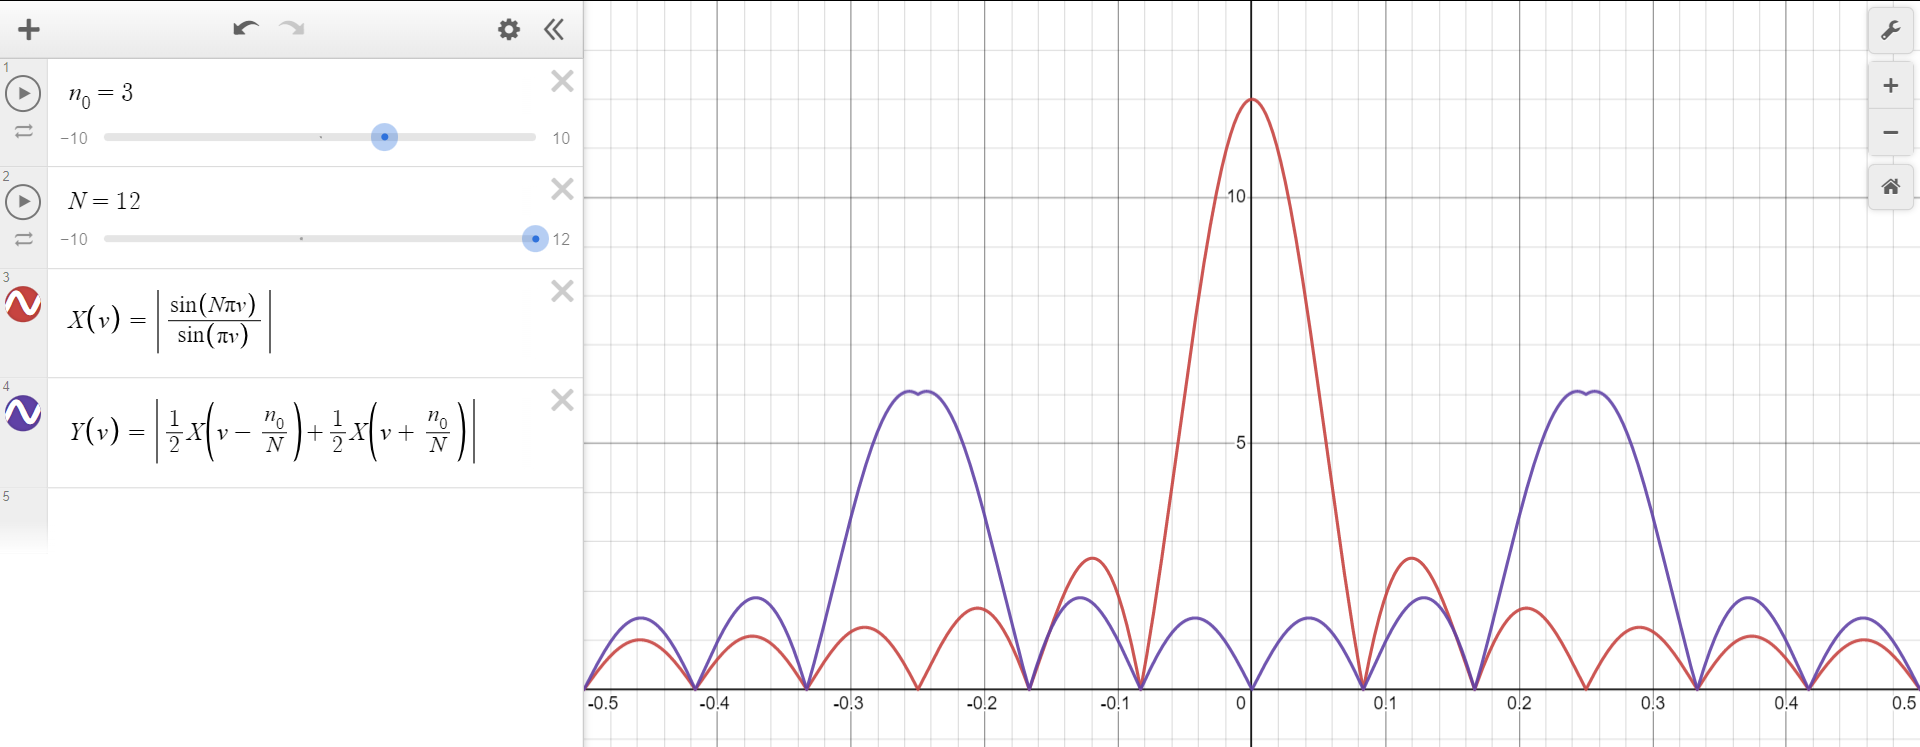

In [18]:
# from PIL import Image
# myImage = Image.open("./pic1.png")
# myImage.show()

from IPython.display import Image
Image(filename="./pic1.png") 

[link](https://www.desmos.com/calculator/fhejuvjwsu)

$$\nprec x[k]$$

In [13]:
# gen 1, 1, ..., 1 (N times)
x = np.ones(N)
# gen 0, 1, ..., N-1
k = np.arange(x.size)
print('x = ', x)
print('k = ', k)

x =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
k =  [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [30]:
def digit_plot(x, y, x_label="$k$", y_label="$x[k]$", title="Сигнал $x[k]$"):
    figure = plt.figure(figsize=[6, 2], dpi=120)
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    plt.stem(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()
    plt.show()

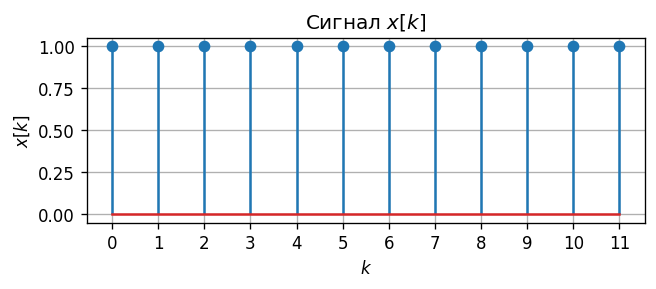

In [31]:
digit_plot(k, x)

$$ \nprec \left| X(\nu ) \right|=\left| \dfrac{\sin (N\pi \nu )}{\sin (\pi \nu )} \right| $$

In [14]:
# DTFT
# returns (x in [-0.5, 0.5], DTFT(x))
def dftf(x, M=1024):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))

In [16]:
nu_array, X_nu_array = dftf(x, M=1024)

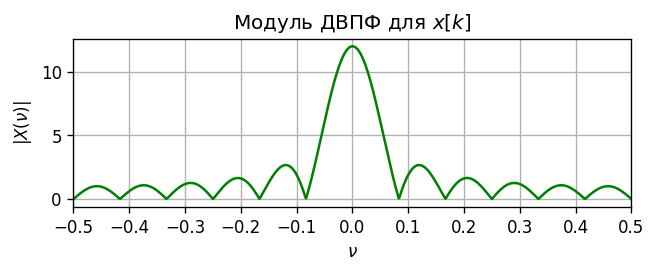

In [17]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_array, abs(X_nu_array), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $x[k]$")
plt.grid()

$$ \prec y[k] $$

In [70]:
y = np.cos(2*np.pi * k * n0/N)
y

array([ 1.00000000e+00,  6.12323400e-17, -1.00000000e+00, -1.83697020e-16,
        1.00000000e+00,  1.19434012e-15, -1.00000000e+00, -4.28626380e-16,
        1.00000000e+00,  5.51091060e-16, -1.00000000e+00, -2.44991258e-15])

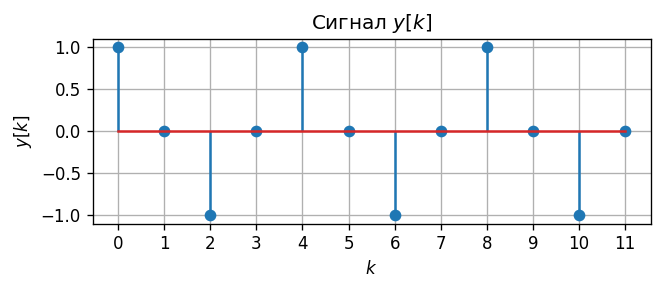

In [71]:
digit_plot(k, y, y_label="$y[k]$", title="Сигнал $y[k]$")

In [72]:
nu_array, Y_nu_array = dftf(y, M=1024)

In [73]:
def DTFT_ABS(nu_array, X_nu_array, arg_name="x"):
    plt.figure(figsize=[6, 4], dpi=120)
    ax1 = plt.subplot(2, 1, 1)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
    plt.plot(nu_array, abs(X_nu_array), 'g')
    plt.xlabel("$\\nu$")
    plt.ylabel(f"$|{arg_name}(\\nu)|$")
    plt.xlim([-0.5, 0.5])
    plt.title(f"Модуль ДВПФ для ${arg_name.upper()}[k]$")
    plt.grid()

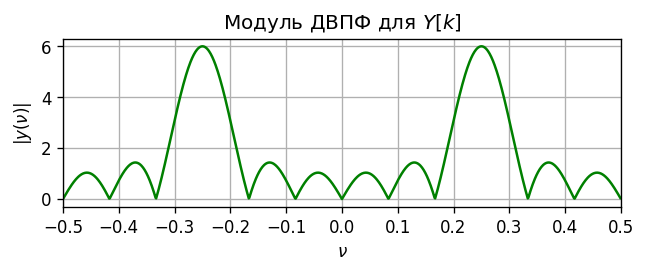

In [75]:
DTFT_ABS(nu_array, Y_nu_array, arg_name="y")

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

In [62]:
x = np.random.randint(low=-5, high=5, size=(N,))
x

array([ 3,  1, -1,  3,  2, -4,  2, -1,  1, -2,  1,  2])

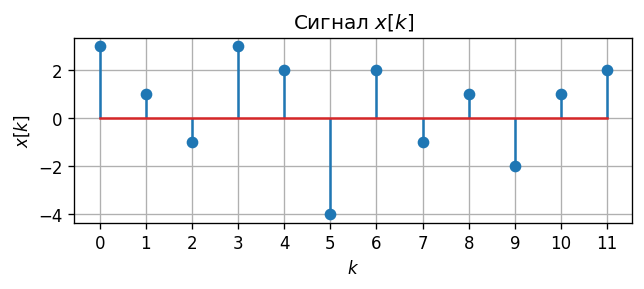

In [77]:
digit_plot(k, x)

In [78]:
nu_array, X_nu_array = dftf(x, M=1024)

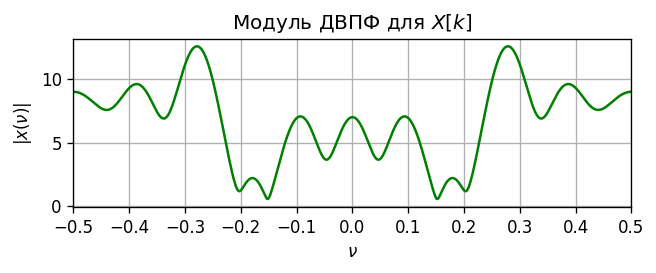

In [84]:
DTFT_ABS(nu_array, X_nu_array)

In [80]:
def DTFT_phase(nu_array, X_nu_array, arg_name="x"):
    ax2 = plt.subplot(2, 1, 2)
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
    plt.plot(nu_array, np.angle(X_nu_array), 'b')
    plt.xlabel("$\\nu$")
    plt.ylabel("$\\varphi(\\nu)$")
    plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
    plt.xlim([-0.5, 0.5])
    plt.title(f"Фаза ДВПФ для ${arg_name}[k]$")
    plt.grid()
    plt.tight_layout()
    plt.show()

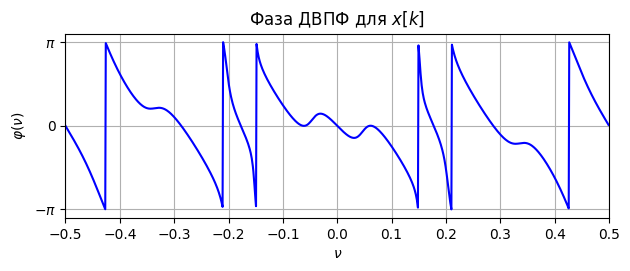

In [81]:
DTFT_phase(nu_array, X_nu_array)

In [82]:
def DTFT_ImRe(nu_array, X_nu_array, arg_name="x"):
    plt.figure(figsize=[6, 4], dpi=120)
    ax1 = plt.subplot(2, 1, 1)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
    plt.plot(nu_array, X_nu_array.real, 'g')
    plt.xlabel("$\\nu$")
    plt.ylabel(f"Re ${arg_name.upper()}(\\nu)$")
    plt.xlim([-0.5, 0.5])
    plt.title(f"ДВПФ для ${arg_name}[k]$")
    plt.grid()
    ax2 = plt.subplot(2, 1, 2)
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
    plt.plot(nu_array, X_nu_array.imag, 'b')
    plt.xlabel("$\\nu$")
    plt.ylabel(f"Im ${arg_name.upper()}(\\nu)$")
    plt.xlim([-0.5, 0.5])
    plt.grid()
    plt.tight_layout()
    plt.show()

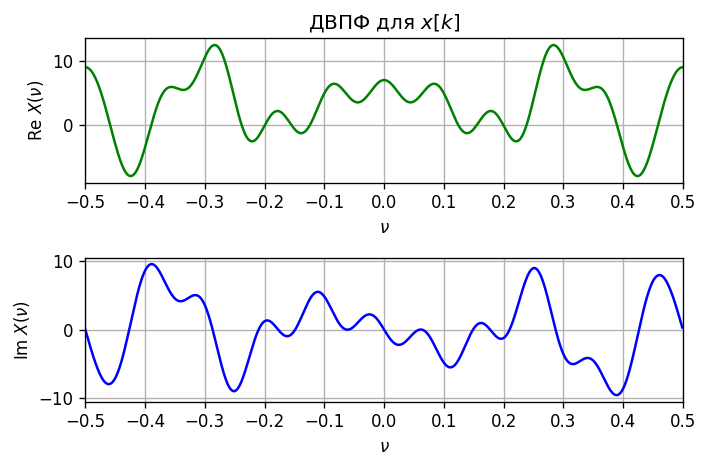

In [83]:
DTFT_ImRe(nu_array, X_nu_array)

# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |

 Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

### (1)
По т. Смещения `Y[n]` получен путем умножения `x[k]` на мнимую экспоненту, т.е. 
$$
y[k] = x[k]\exp(-j2\pi k \frac{n_0}{l})
$$
### (2)

In [9]:
# Inputs

# x[k]
x_k = np.array([4.1, 3.5, 1.2, 5.0, 2.0, 3.3])

# N = l (see var 1)
N = 6

n0 = -3

In [7]:
# Functions

def plot_signal(k, x_k):
    figure1 = plt.figure(figsize=[6, 2], dpi=120)
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    plt.stem(k, x_k)
    plt.xlabel("$k$")
    plt.ylabel("$x[k]$")
    plt.title("Сигнал $x[k]$")
    plt.grid()
    plt.show()

def plot_FFT(n, X_n):
    figure, axs = plt.subplots(2, 2, figsize=[10, 8], dpi=100)
    axs[0, 0].stem(n, X_n.real)
    axs[0, 0].set_ylabel('Re $X[n]$')

    axs[0, 1].stem(n, X_n.imag)
    axs[0, 1].set_ylabel('Im $X[n]$')

    axs[1, 0].stem(n, abs(X_n))
    axs[1, 0].set_ylabel('$|X[n]|$')

    axs[1, 1].stem(n, np.angle(X_n))
    axs[1, 1].set_ylabel('$\\varphi [n]$, рад')
    axs[1, 1].set_yticks((-np.pi, -np.pi/2, 0, np.pi/2, np.pi))
    axs[1, 1].set_yticklabels(("$-\\pi$", "$-\\dfrac{\\pi}{2}$", "0", "$\\dfrac{\\pi}{2}$", "$\\pi$"))
    axs[1, 1].set_ylim((-np.pi, np.pi))

    for ax in axs.flat:
        ax.set(xlabel='$n$')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
        ax.grid()
    plt.tight_layout()
    plt.show()

x[k]: [4.1 3.5 1.2 5.  2.  3.3]
n: [0 1 2 3 4 5]
X[n]: [19.1+0.00000000e+00j  0.9+5.19615242e-01j  4.1-8.66025404e-01j
 -4.5-5.55111512e-17j  4.1+8.66025404e-01j  0.9-5.19615242e-01j]


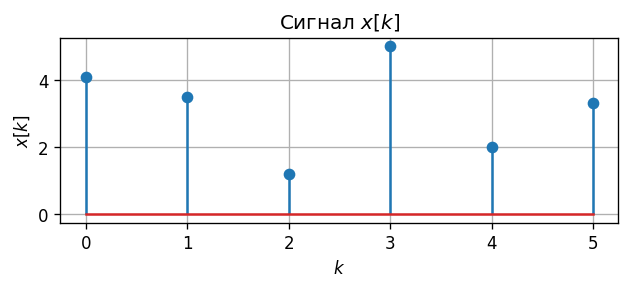

ДПФ


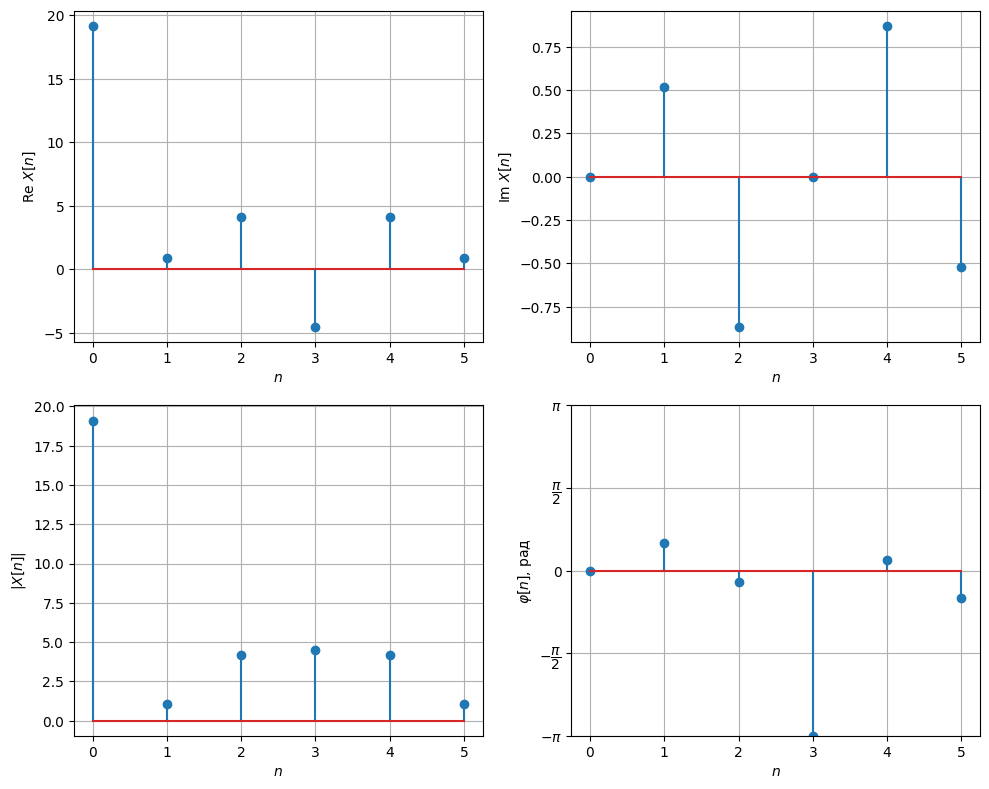

In [8]:
# X[n] (not normalized)
X_n = np.fft.fft(x_k)
k = np.arange(len(x_k))
n = np.arange(N)

print(f"x[k]: {x_k}\nn: {n}\nX[n]: {X_n}")
plot_signal(k, x_k)
print("ДПФ")
plot_FFT(n, X_n)


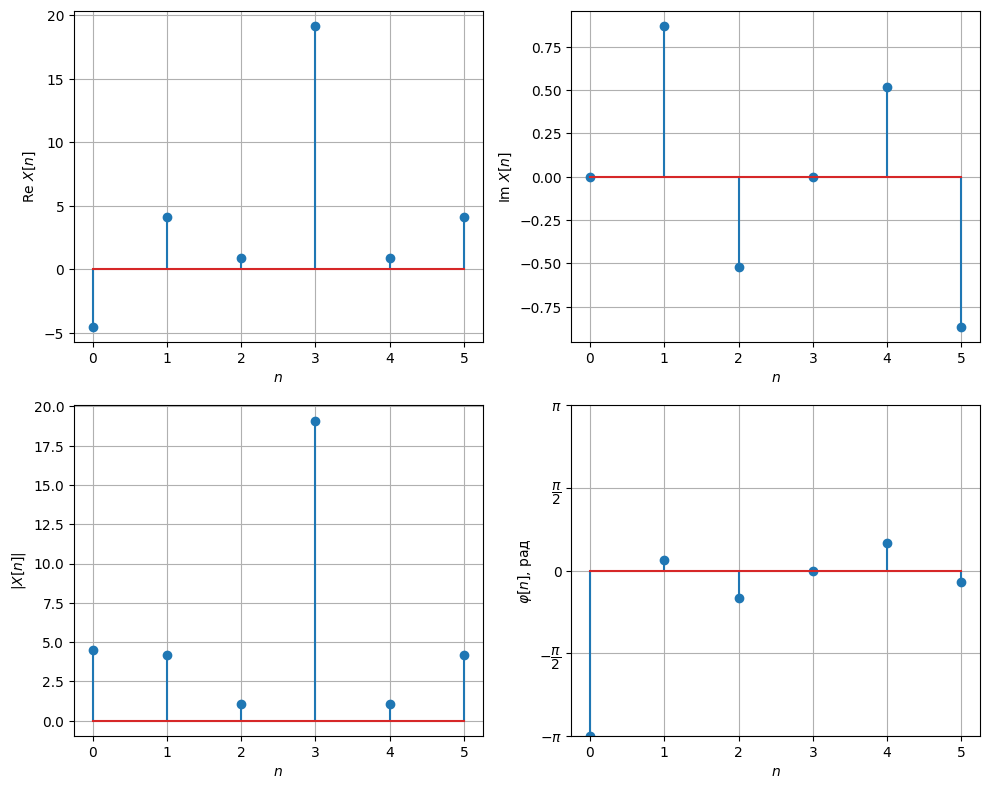

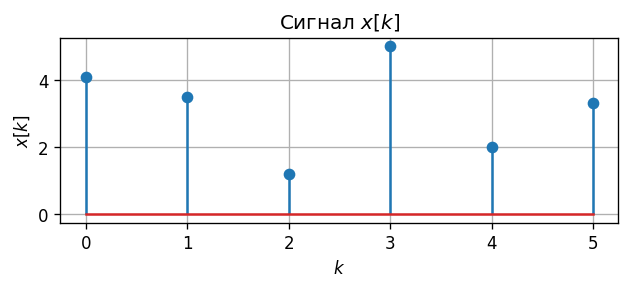

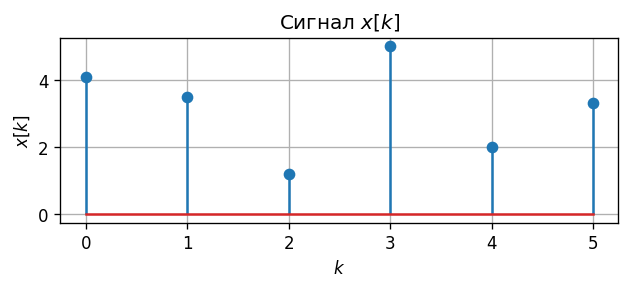

In [10]:
Y_n = np.roll(X_n, n0)
y_k = np.fft.ifft(Y_n)
y_k_test = x_k * np.exp(-1j*2*np.pi * n0 / N)

plot_FFT(n, Y_n)
plot_signal(k, np.abs(y_k))
plot_signal(k, np.abs(y_k_test))

> Вывод.
> Наблюдается циклический сдвиг ДПФ.
> Восстановлен сигнал `y[k]` двумя способами: аналитически и ч/з обр. ДПФ. Результаты идентичны.

## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


Из теории следует, что при действительном дискретном сигнале выполняется равенство:
$$
X[n] = X^{*}[N-n]_{N}
$$

Следовательно, у спектра будет наблюдаться симметрия относительно $\frac{N}{2}$:
* Осевая - для действительной части
* Центральная - для мнимой части

X[0 - 6]:	[12.+0.j -7.-5.j  1.-8.j  4.+3.j  2.+6.j  4.-4.j  0.+0.j]
X[7 - 11]:	[ 4.+4.j  2.-6.j  4.-3.j  1.+8.j -7.+5.j]
X[n]:
[12.+0.j -7.-5.j  1.-8.j  4.+3.j  2.+6.j  4.-4.j  0.+0.j  4.+4.j  2.-6.j
  4.-3.j  1.+8.j -7.+5.j]


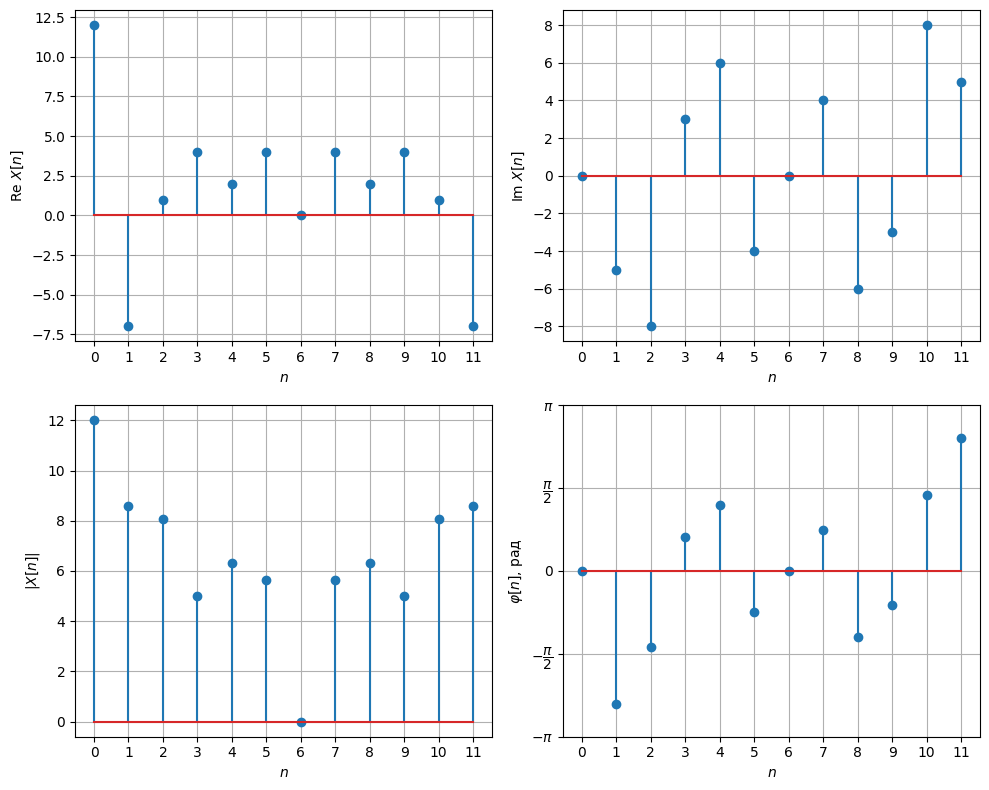

In [45]:
# Init

# Init X[n] w/ 1st half of bins
first_half = np.array([12, -7-5j, 1-8j, 4+3j, 2+6j, 4-4j, 0])
# Generate the 2nd half of bins
second_half = np.conjugate(np.flip(first_half[:-1]))[:-1]
X_n = np.append(first_half, second_half)
print(f"X[0 - 6]:\t{first_half}")
print(f"X[7 - 11]:\t{second_half}")
print(f"X[n]:\n{X_n}")
N = 12

n = np.arange(len(X_n))
plot_FFT(n, X_n)

Заметим, что
$$
X[n]= \sum_{k=0}^{N-1} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right) = [n = 0] = \sum_{k=0}^{N-1} x[k]
$$
Тогда
$$
<x[k]> = \frac{X[0]}{N}
$$

### Вычисление ср.арифметического, энергии и мощности аналитическим методом

In [51]:
x_k_av = X_n[0] / N
print(x_k_av)

(1+0j)


In [50]:
x_k_energy = sum(np.abs(i)**2 for i in X_n) / N
print(x_k_energy)

51.333333333333336


In [52]:
x_k_power = x_k_energy / N
print(x_k_power)

4.277777777777778


### Вычисление ср.арифметического, энергии и мощности с помощью обратного ДПФ

In [58]:
x_k = np.fft.ifft(X_n)
x_k_av_ex = sum(i for i in x_k) / N
print(x_k_av_ex)
x_k_energy_ex = sum(np.abs(i)**2 for i in x_k)
print(x_k_energy_ex)
x_k_power_ex = x_k_energy_ex / N
print(x_k_power_ex)

(1.0000000000000002+0j)
51.33333333333332
4.277777777777777


> Вывод
> Верификация аналитического метода и метода обр. ДПФ прошла успешно, что подтверждает корректность моделирования.

## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

In [5]:
# Input
r1 = 3
r2 = 5
N = 12

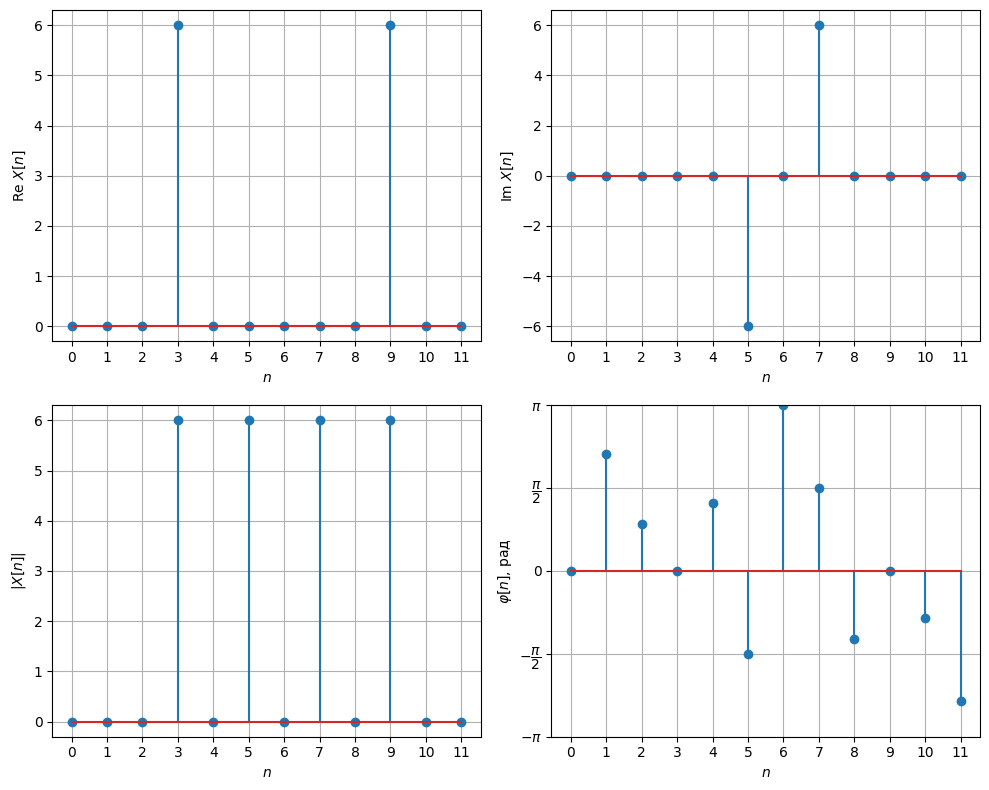

In [9]:
k = np.arange(N)
x_k = np.cos(2*np.pi*k * r1/N) + np.sin(2*np.pi*k * r2/N)
X_n = np.fft.fft(x_k)
plot_FFT(k, X_n)

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



In [105]:
# Functions

def plot_signal(k, x_k, size=6):
    figure1 = plt.figure(figsize=[size, 2], dpi=120)
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    plt.stem(k, x_k)
    plt.xlabel("$k$")
    plt.ylabel("$x[k]$")
    plt.title("Сигнал $x[k]$")
    plt.grid()
    plt.show()
    
def plot_FFT(n, X_n, size=10):
    figure, axs = plt.subplots(2, 2, figsize=[size, 8], dpi=100)
    axs[0, 0].stem(n, X_n.real)
    axs[0, 0].set_ylabel('Re $X[n]$')

    axs[0, 1].stem(n, X_n.imag)
    axs[0, 1].set_ylabel('Im $X[n]$')

    axs[1, 0].stem(n, abs(X_n))
    axs[1, 0].set_ylabel('$|X[n]|$')

    axs[1, 1].stem(n, np.angle(X_n))
    axs[1, 1].set_ylabel('$\\varphi [n]$, рад')
    axs[1, 1].set_yticks((-np.pi, -np.pi/2, 0, np.pi/2, np.pi))
    axs[1, 1].set_yticklabels(("$-\\pi$", "$-\\dfrac{\\pi}{2}$", "0", "$\\dfrac{\\pi}{2}$", "$\\pi$"))
    axs[1, 1].set_ylim((-np.pi, np.pi))

    for ax in axs.flat:
        ax.set(xlabel='$n$')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
        ax.grid()
    plt.tight_layout()
    plt.show()
    
def example_Zero_Padding(x_k, Nz=0):
    # signal  
    N=len(x_k)
    x=x_k
    size = len(x_k)

    # zero padding
    x=np.hstack((x, np.zeros(Nz)))
    print(f"N={N}")
    N=N+Nz
    print(f"N={N}")
    print(f"Nz={Nz}")
    # plot of signal
    figure1 = plt.figure(figsize=[size, 5], dpi=100)
    plt.subplot(2, 1, 2)
    plt.stem(np.arange(x.size), x, linefmt='b', markerfmt='bo')
    #plt.title(u'Сигнал $x[k]=\sin(2\pi 2.1 k /16)+\sin(2\pi 3.1 k /16)+\sin(2\pi 5.6 k /16)$, $0 \\leq k \\leq 15$')
    plt.title(u'Сигнал $x[k]$, дополненный %i нулями' %Nz, fontsize=14, pad=12)
    plt.xlabel(u'$k$')
    plt.ylabel(u'$x[k]$')
    plt.grid()
    # DTFT 
    plt.subplot(2, 1, 1)
    M=1024
    plt.plot(np.arange(M)/M, abs((np.fft.fft(x, M))), 'm')
    # DFTmarkerfmt=
    print(f"N={N}")
    plt.stem(np.arange(N)/N, abs((np.fft.fft(x))), linefmt='g', markerfmt='go')
    plt.axis(xmin=0, xmax=1, ymin=0)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title(u'ДВПФ и ДПФ$_{N=%i}$ сигнала x$[k]$ (один период)' %(N), fontsize=14, pad=12)
    plt.xlabel(u'$\\nu$')
    plt.ylabel(u'$|X(\\nu)|$')
    plt.annotate(u"$\mathbf{\dots}$", (0.01, 5))
    plt.annotate(u"$\mathbf{\dots}$", (0.96, 5))
    plt.grid()
    plt.tight_layout()
    plt.show()

# Input
N = 16
w_k = np.ones(N)

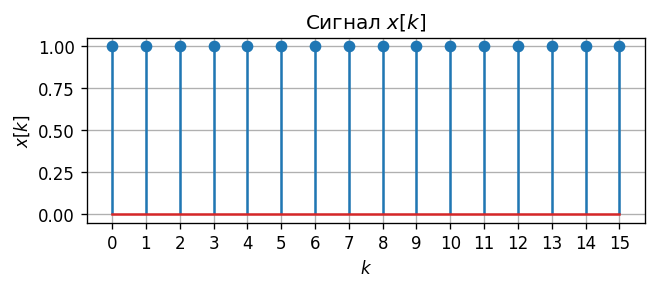

In [86]:
plot_signal(np.arange(N), w_k)

Для прямоугольного окна при ДПФ получаем сумму экспонент, которая равна N только при n=0, в остальных случаях на периоде получаем нуль.

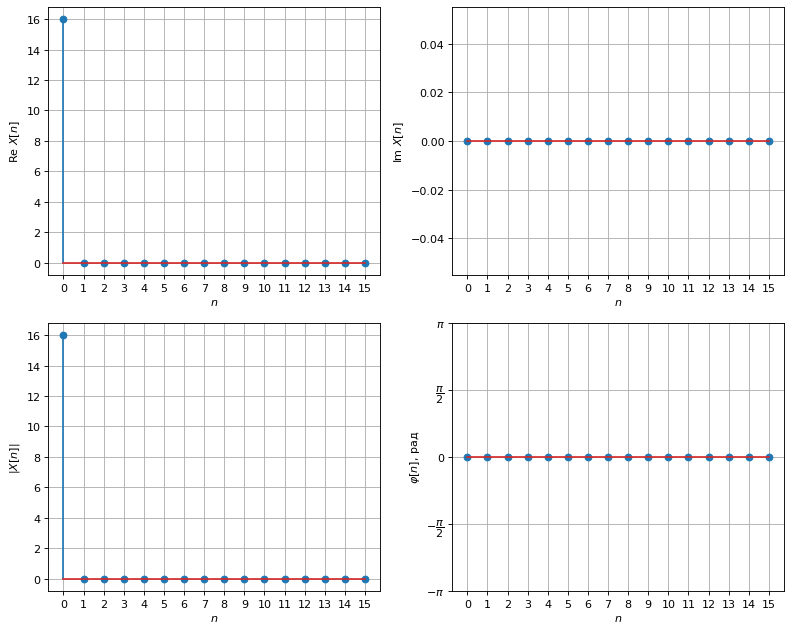

In [76]:
W_n = np.fft.fft(w_k)
plot_FFT(np.arange(N), W_n)

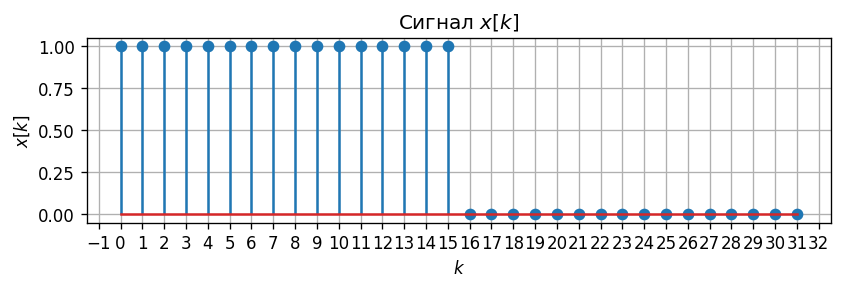

In [72]:
w_k_double = np.append(w_k, np.zeros(N))
plot_signal(np.arange(len(w_k_double)), w_k_double, size=8)

После ДПФ `Y[n]` не будет иметь одну спектральную компоненту, т.к. сумма членов геометрической прогрессии из экспонент ДПФ уже не образует нуль (из-за различия числа отсчетов по n и ненулевых по k) 

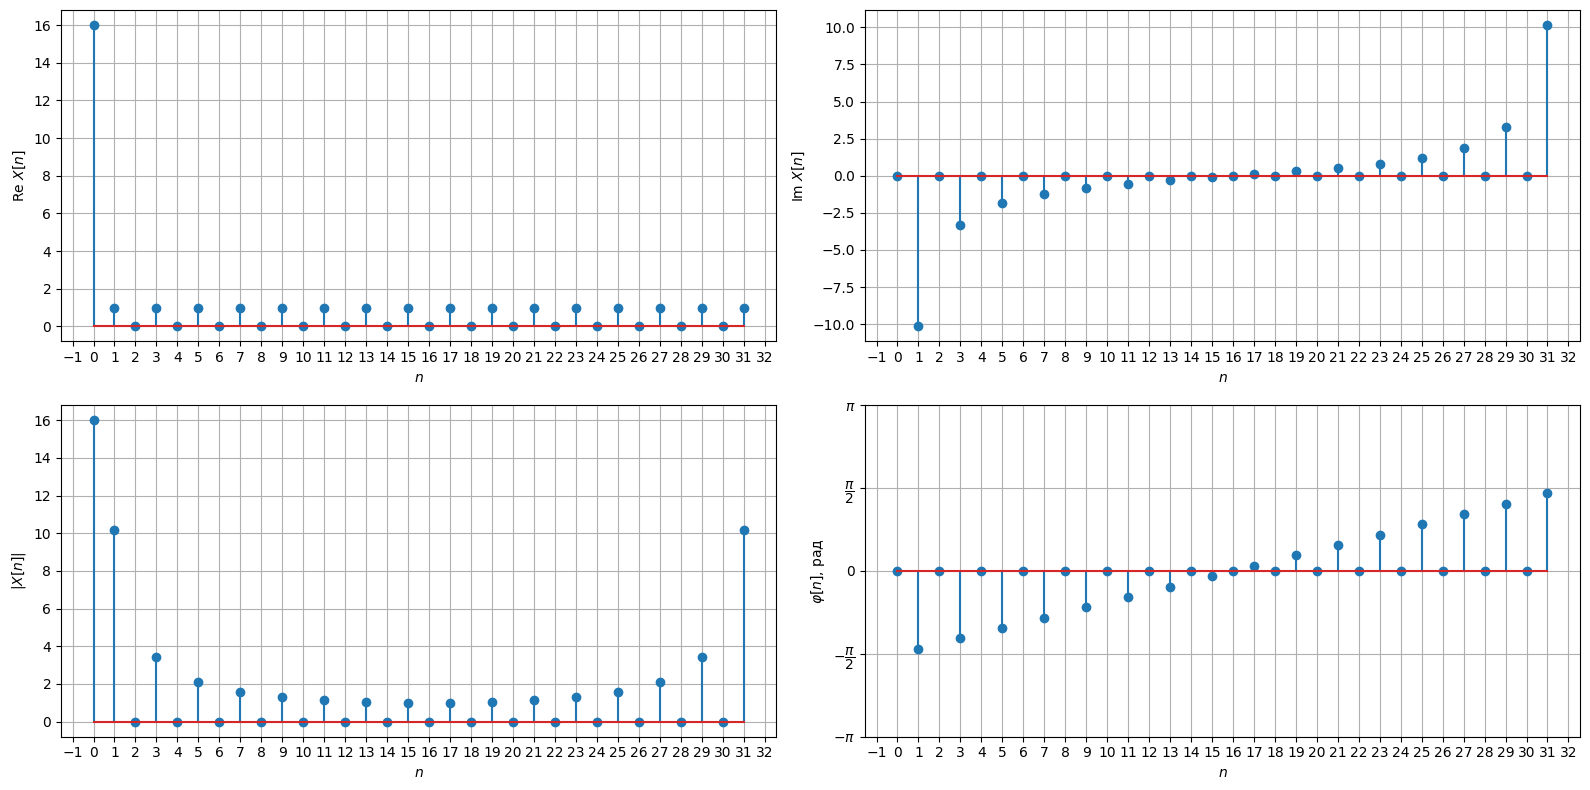

In [81]:
W_n_double = np.fft.fft(w_k_double, 2*N)
plot_FFT(np.arange(len(w_k_double)), W_n_double, size=16)

N=16
N=32
Nz=16
N=32


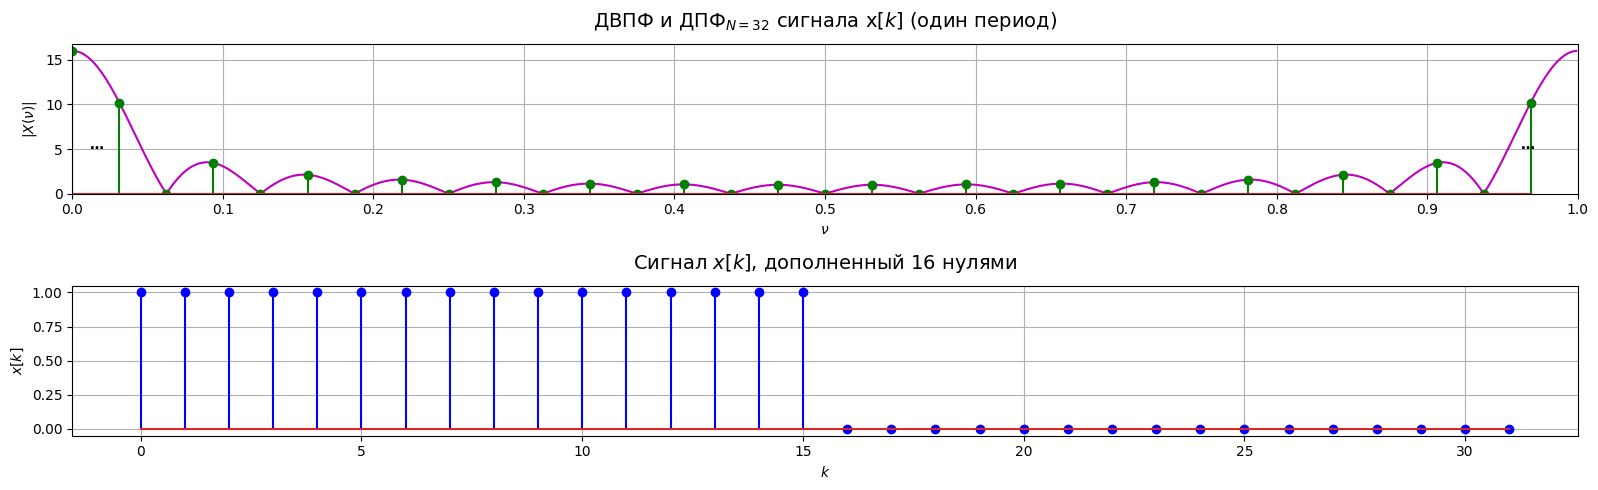

In [98]:
example_Zero_Padding(w_k, Nz=2*N-N)

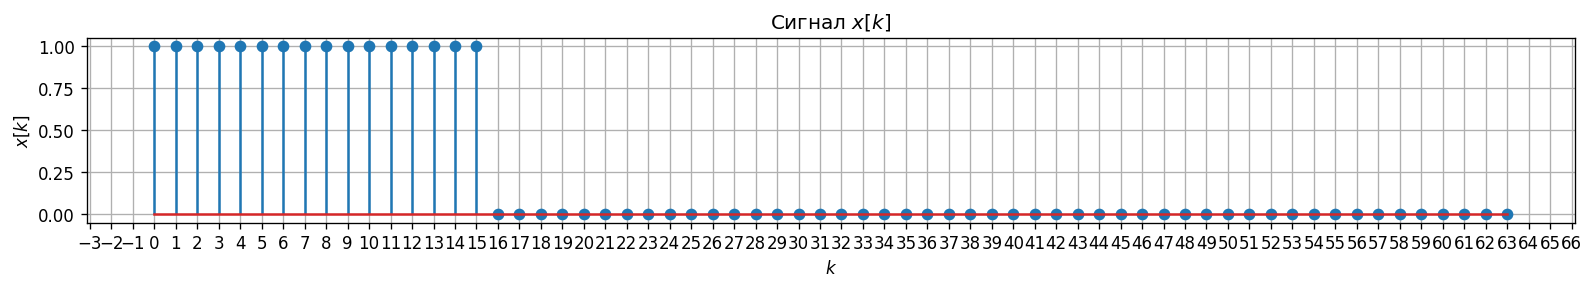

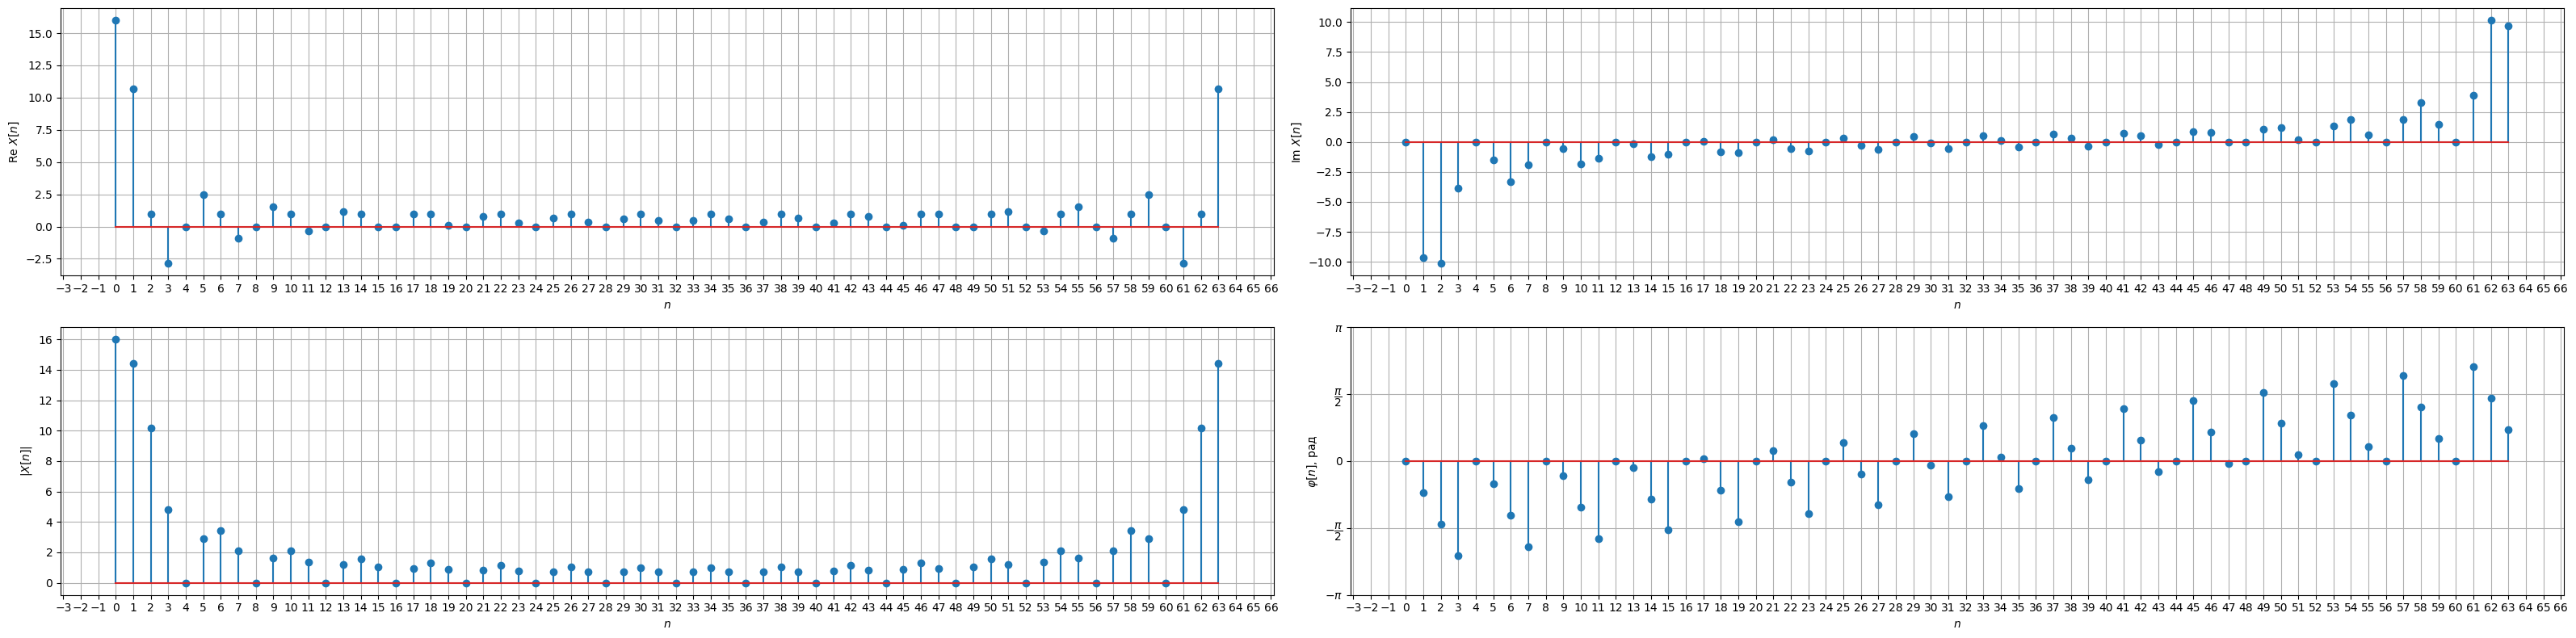

In [83]:
w_k_quad = np.append(w_k_double, np.zeros(2*N))
plot_signal(np.arange(len(w_k_quad)), w_k_quad, size=16)
W_n_quad = np.fft.fft(w_k_quad, 4*N)
plot_FFT(np.arange(len(w_k_quad)), W_n_quad, size=32)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
N=16
N=64
Nz=48
N=64


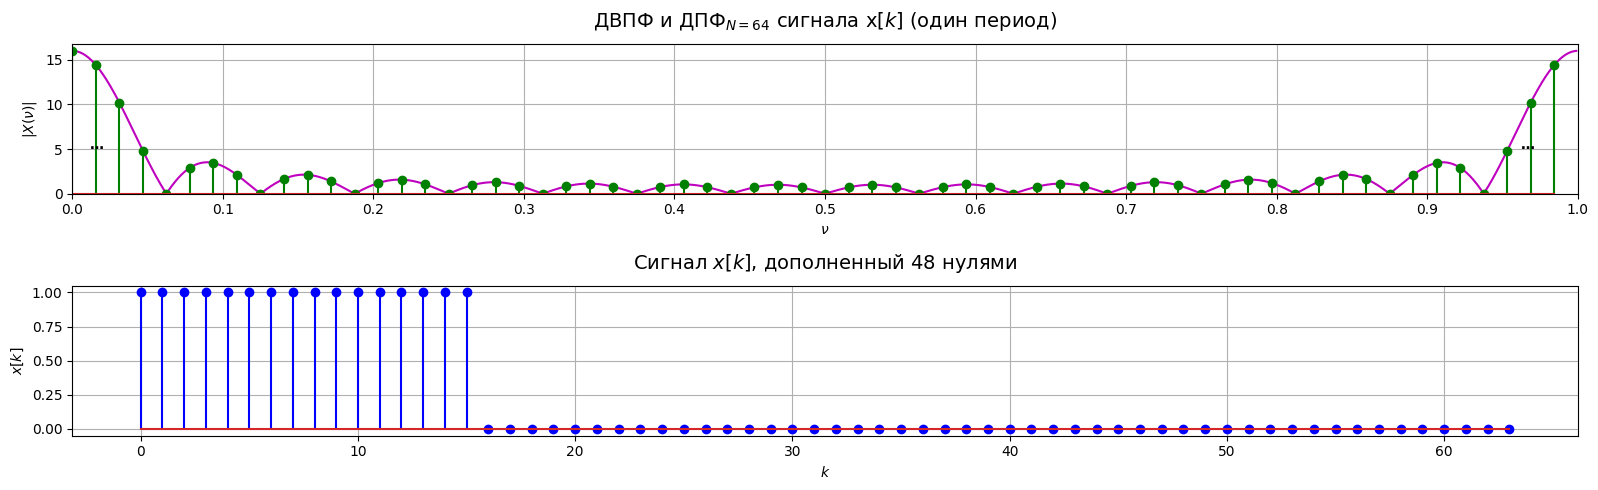

In [97]:
print(w_k)
example_Zero_Padding(w_k, Nz=4*N-N)

## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

Вычислим аналитически ДВПФ, используя свойство гарм. сигналов
$$
X(\nu)=\frac{1}{2j}\sum_{n=-\infty}^{+\infty}\delta(\nu-\nu_1-n) \
- \frac{1}{2j}\sum_{n=-\infty}^{+\infty}\delta(\nu+\nu_1-n) \
+ \frac{1}{2}\sum_{n=-\infty}^{+\infty}\delta(\nu-\nu_2-n) \
+ \frac{1}{2}\sum_{n=-\infty}^{+\infty}\delta(\nu+\nu_2-n)
$$

$$
\nu_1=\frac{r_1}{N} \\
\nu_2=\frac{r_2}{N}
$$

Возникнут множества периодических дельта функций c амплитудами $\pm 0.5$, $\pm 0.5j$
$$\pm \frac{r_1}{N} + m$$
$$\pm \frac{r_2}{N} + m$$
$$ m \in Z $$

При этом
$$
\nu_n = \frac{n}{N}
$$

На периоде ДПФ увидим 3/16, 7/16, (-3/16)%16=13/16, (-7/16)%16=9/16 - 4 компонены с амплитудами 0,5 (по модулю)

In [106]:
# INPUTS
N = 16
r1 = 3
r2 = 7

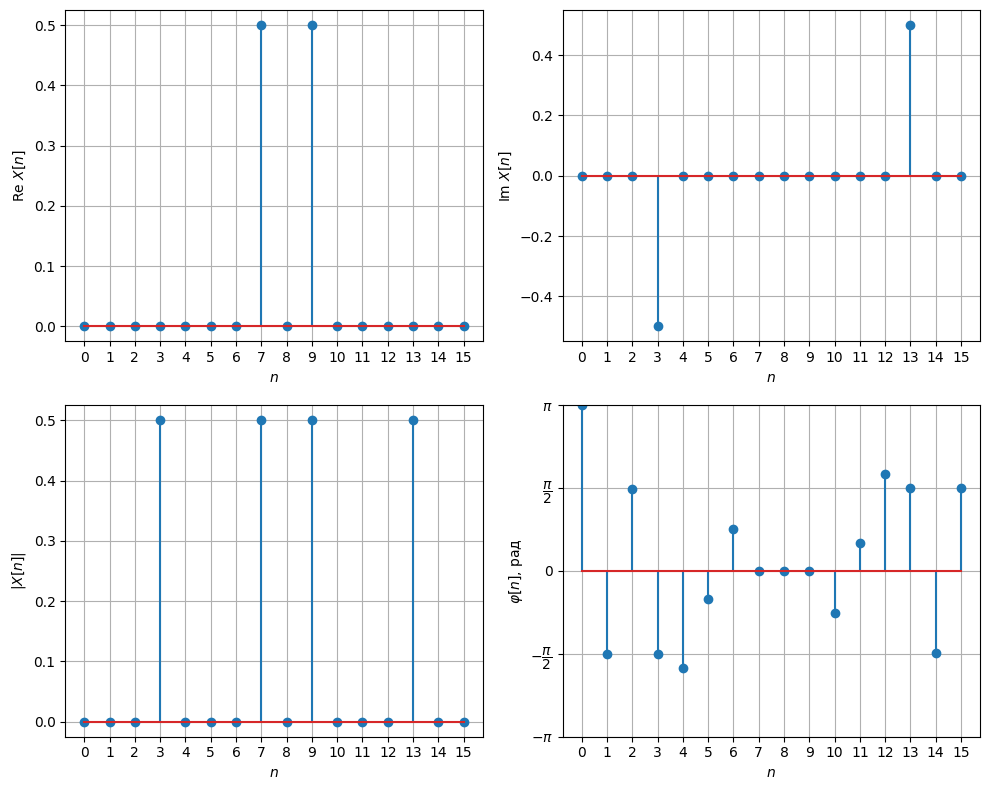

In [109]:
k = np.arange(N)
x_k = np.sin(2*np.pi*k *r1/N) + np.cos(2*np.pi*k *r2/N)
X_n = np.fft.fft(x_k) / N

plot_FFT(np.arange(N), X_n)

## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

In [113]:
# Inputs
P = 32768
N = 512
n0 = N/2 - 2
k = np.arange(N)
x_k = np.sin(2*np.pi*k * n0)

In [138]:
# Manual DTFT
X_n1 = np.zeros(P, dtype='complex')

start = time.time()
for v in range(P):
    # products 2 arrays: sum(x[k] * exp(...)) and adds to 0 = value for current n=v
    # interates over all n
    X_n1[v] = X_n1[v] + np.dot(np.exp(-1j*k*2*np.pi * v/P), x_k)
manual_time = time.time()-start
print("Time ", manual_time, "c")

Time  1.0170319080352783 c


In [139]:
fast_P = sp.fft.next_fast_len(P)
print(P, fast_P)

32768 32768


In [153]:
# Using python FFT
start=time.time()
X_n2 = sp.fft.fft(x, P, workers=4)
fft_time = time.time() - start
print("Time ", fft_time, "c")

Time  0.00893259048461914 c


dn = 1.845761234370112e-21
dt = 1.0080993175506592


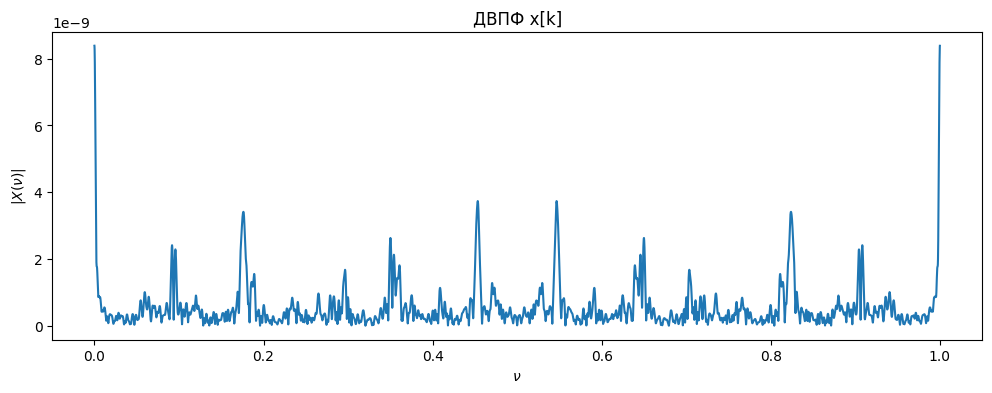

In [158]:
# error / time
print(f"dn = {max(abs(X_n1 - X_n2))}")
print(f"dt = {abs(fft_time - manual_time)}")
              
plt.figure(figsize=[12, 4], dpi=100)
plt.plot(np.arange(P)/P, abs(X_n1))
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.title('ДВПФ x[k]')
plt.show()

## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

In [212]:
def wav_analysis(filename, time_delay=0, time_duration=0):
    
    Audio(filename)
    rate, sample = scipy.io.wavfile.read(filename)
    
    if time_duration == 0:
        time_duration = sample.size
        print("Defaults")

    print(f"Number of values:\t{sample.size}\nRate:\t{rate}\nDuration:\t{sample.size/rate}")
    print(f"Start:\t{time_delay}\nEnd:\t{time_delay + time_duration}")
    x = sample[time_delay:(time_delay+time_duration)]
    plt.figure(figsize=[8, 3])
    plt.plot(np.arange(x.size) / rate, x, 'm.')
    #plt.stem(np.arange(x.size)/fs, x, 'g', 'g.', use_line_collection=True)
    plt.xlabel(u'$t$, c')
    plt.ylabel(u'$x(t)$')
    plt.title(f'Сигнал {filename}, $f_d$={rate} Гц, $\Delta t=${1.0/rate:.6f}  c')
    plt.grid()
    return rate, x

Defaults
Number of values:	143336
Rate:	44100
Duration:	3.250249433106576
Start:	0
End:	143336


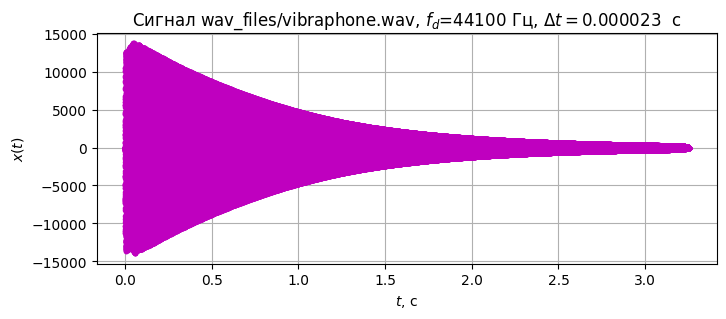

In [213]:
filename='wav_files/vibraphone.wav'
time_delay = 0
time_duration = 0
rate, signal = wav_analysis(filename)

Рассмотрим промежуток 3.0-3.1 - в этот момент большинство обертонов от удара по ксилофону уже затухнет, останется основной тон инструмента.

Number of values:	143336
Rate:	44100
Duration:	3.250249433106576
Start:	132300
End:	133182


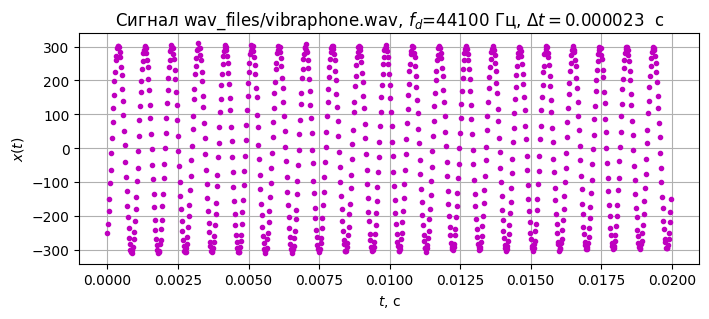

In [214]:
start = int(3.0 * rate)
duration = int(0.02 * rate)
rate, signal = wav_analysis(filename, time_delay=start, time_duration=duration)

In [265]:
def get_spectrum(signal, rate, zoom=False):
    plt.figure(figsize=[25, 3], dpi=80)
    M=4096
    f = (-0.5+(np.arange(M)/M))*rate
    X_f_abs = abs(np.fft.fftshift(np.fft.fft(signal, M)))/M
    plt.plot(f, 
             X_f_abs, 
             'g'); 
    
    if not zoom:
        plt.axis(xmin=-rate/2, xmax=rate/2, ymin=0)
        plt.xticks([-rate/2, 0, rate/2])
    else:
        plt.axis(xmin=40, xmax=2200, ymin=0)
#         plt.xticks([40, 2200])
        plt.xticks(np.linspace(40, 2200, 50))

    plt.title(u'ДВПФ  of $x[k]$, $f_д=%d$ Гц, $\Delta f=%.3f$ Гц' %(rate, rate/M))
    plt.xlabel(u'$f$, Гц')
    plt.ylabel(u'$|X(f)|$')
    plt.grid()
    
    maximum = np.max(X_f_abs)
#     print(maximum)
    main_it = 0
    for it in range(len(X_f_abs)):
#         print(it, X_f_abs[it])
        if (maximum - X_f_abs[it]) > 0 and (maximum - X_f_abs[it]) < 0.01:
            main_it = it
            break 
#     print(main_it, f[main_it])
    return f[main_it]

main tone: 1055.13 Hz


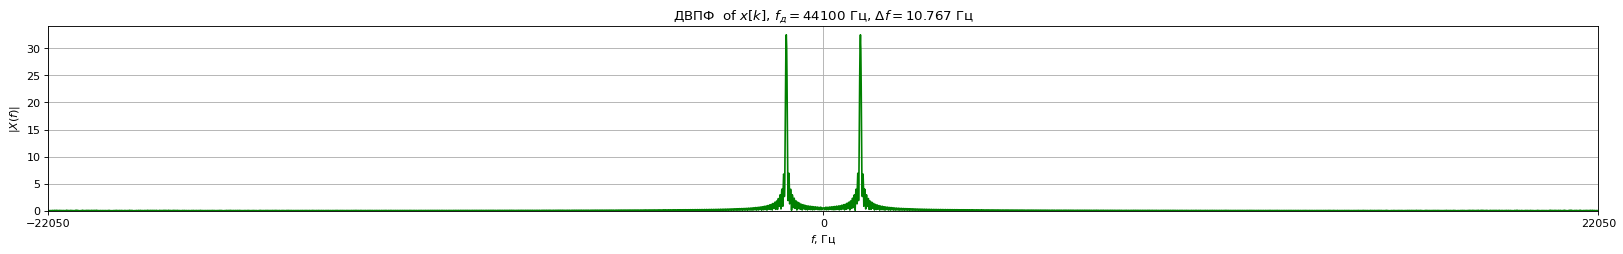

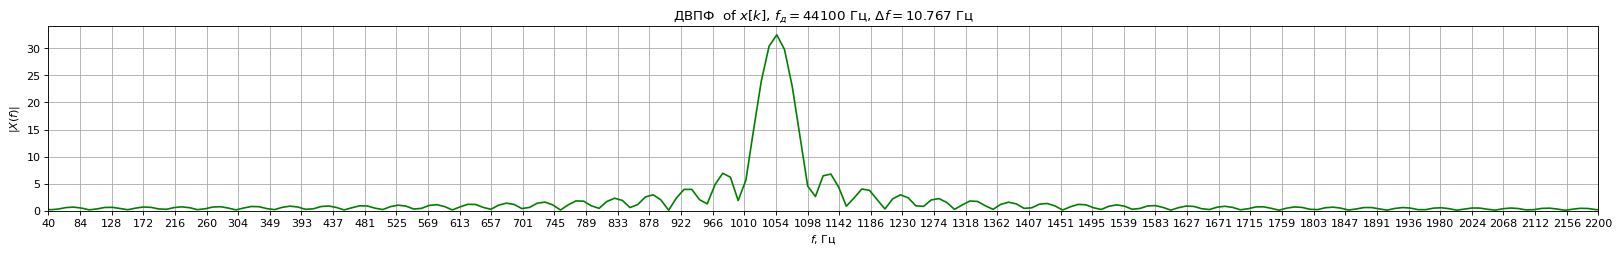

In [267]:
get_spectrum(signal, rate)
main_it = get_spectrum(signal, rate, zoom=True)
print(f"main tone: {main_it:.2f} Hz")

In [268]:
43%6

1